/home/tinzog/anaconda3/envs/AI/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


KeyError: 'u'

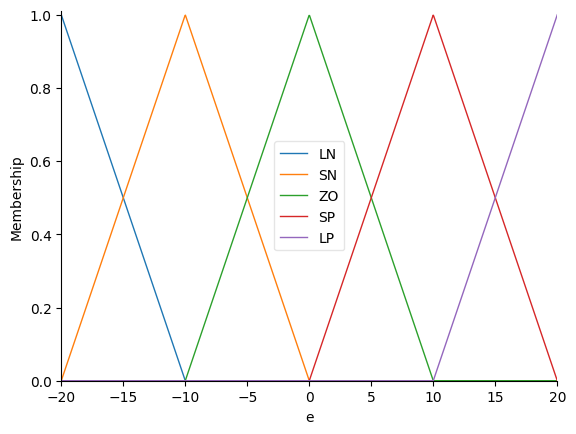

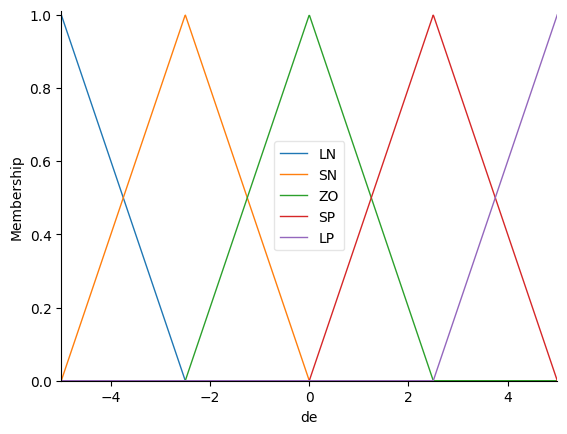

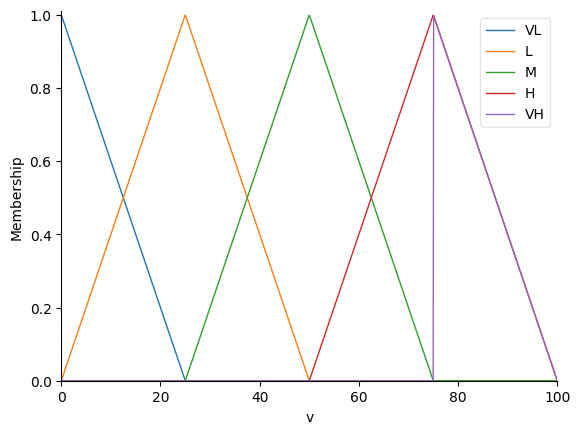

In [5]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Input
e  = ctrl.Antecedent(np.linspace(-20, 20, 1000), 'e')
de = ctrl.Antecedent(np.linspace(-5, 5, 1000), 'de')

# Output 
v = ctrl.Consequent(np.linspace(0, 100, 1000), 'v')

# Membership functions
e['LN'] = fuzz.trimf(e.universe,[-20, -20, -10])
e['SN'] = fuzz.trimf(e.universe,[-20, -10, 0])
e['ZO'] = fuzz.trimf(e.universe,[-10, 0, 10])
e['SP'] = fuzz.trimf(e.universe,[0, 10, 20])
e['LP'] = fuzz.trimf(e.universe,[10, 20, 20])

de['LN'] = fuzz.trimf(de.universe,[-5, -5, -2.5])
de['SN'] = fuzz.trimf(de.universe,[-5, -2.5, 0])
de['ZO'] = fuzz.trimf(de.universe,[-2.5, 0, 2.5])
de['SP'] = fuzz.trimf(de.universe,[0, 2.5, 5])
de['LP'] = fuzz.trimf(de.universe,[2.5, 5, 5])

v['VL'] = fuzz.trimf(v.universe,[ 0,  0,  25])
v['L']  = fuzz.trimf(v.universe,[ 0, 25,  50])
v['M']  = fuzz.trimf(v.universe,[25, 50,  75])
v['H']  = fuzz.trimf(v.universe,[50, 75, 100])
v['VH'] = fuzz.trimf(v.universe,[75, 75, 100])

# Rules
rule = []


rule.append(ctrl.Rule(e['LN'] & de['LN'], v['VH']))
rule.append(ctrl.Rule(e['LN'] & de['SN'], v['VH']))
rule.append(ctrl.Rule(e['LN'] & de['ZO'], v['H']))
rule.append(ctrl.Rule(e['LN'] & de['SP'], v['H']))
rule.append(ctrl.Rule(e['LN'] & de['LP'], v['M']))

rule.append(ctrl.Rule(e['SN'] & de['LN'], v['VH']))
rule.append(ctrl.Rule(e['SN'] & de['SN'], v['H']))
rule.append(ctrl.Rule(e['SN'] & de['ZO'], v['H']))
rule.append(ctrl.Rule(e['SN'] & de['SP'], v['M']))
rule.append(ctrl.Rule(e['SN'] & de['LP'], v['L']))


rule.append(ctrl.Rule(e['ZO'] & de['LN'], v['H']))
rule.append(ctrl.Rule(e['ZO'] & de['SN'], v['H']))
rule.append(ctrl.Rule(e['ZO'] & de['ZO'], v['M']))
rule.append(ctrl.Rule(e['ZO'] & de['SP'], v['L']))
rule.append(ctrl.Rule(e['ZO'] & de['LP'], v['L']))

rule.append(ctrl.Rule(e['SP'] & de['LN'], v['M']))
rule.append(ctrl.Rule(e['SP'] & de['SN'], v['M']))
rule.append(ctrl.Rule(e['SP'] & de['ZO'], v['L']))
rule.append(ctrl.Rule(e['SP'] & de['SP'], v['L']))
rule.append(ctrl.Rule(e['SP'] & de['LP'], v['VL']))

rule.append(ctrl.Rule(e['LP'] & de['LN'], v['L']))
rule.append(ctrl.Rule(e['LP'] & de['SN'], v['L']))
rule.append(ctrl.Rule(e['LP'] & de['ZO'], v['L']))
rule.append(ctrl.Rule(e['LP'] & de['SP'], v['VL']))
rule.append(ctrl.Rule(e['LP'] & de['LP'], v['VL']))


#Control system
valve_control = ctrl.ControlSystem(rule)
valve_simulation = ctrl.ControlSystemSimulation(valve_control)

e.view()
de.view()
v.view()



# Compute
valve_simulation.input['e'] = -15
valve_simulation.input['de'] = -2.5

valve_simulation.compute()

print(valve_simulation.output['v'])

# Valve
v.view(sim = valve_simulation)